In [31]:
%matplotlib inline

In [32]:
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [33]:
# Input and output columns in Dataframe

os.chdir('E:\Academics\Research\Data\Experimental data\Compression_test\Results\As_Built')
Master_Data = pd.read_csv('Data_As_Built_New.csv').dropna(axis = 0,subset = ['X','Y','Theta','Phi','Modulus'],how = 'all')
list(Master_Data)

['Name',
 'Number',
 'X',
 'Y',
 'Theta',
 'Phi',
 'Porosity_Fraction',
 'Max_Pore_Diameter',
 'Mean_Pore_Diameter',
 'Median_Pore_Diameter',
 'Yield',
 'Modulus']

In [34]:
# Input and output columns in Dataframe
Input = ['X','Y','Theta','Phi']
Properties = ['Yield','Modulus']
Output = Properties[1]

In [35]:
# Normalization of data
full = []
full.extend(Input)
full.extend(Properties)
Parsed_Data = Master_Data[full]
# Parsed_Data = Parsed_Data[Parsed_Data['Phi']==45]

In [36]:
Maximum = Parsed_Data[Output].max()
Minimum = Parsed_Data[Output].min()

In [37]:
b = float((Maximum - Minimum)/4)

In [38]:
classes = []

for i in Parsed_Data[Output]:
    if i < Minimum+b:
        classes.append(0)
    elif Minimum+b <= i < Minimum+2*b:
        classes.append(1)
    elif Minimum+2*b <= i < Minimum+3*b:
        classes.append(2)
    elif i > Minimum+3*b:
        classes.append(3)

In [39]:
# m = Parsed_Data[Output].mean()
# s = Parsed_Data[Output].std()

In [40]:
#Defining class of output

# classes = []

# for i in Parsed_Data[Output]:
#     if i <m-s:
#         classes.append(0)
#     elif m-s <= i < m:
#         classes.append(1)
#     elif m < i <= m+s:
#         classes.append(2)
#     elif i > m+s:
#         classes.append(3)

In [41]:
new_input = ['X','Y','Theta','Phi']

In [42]:
Parsed_Data = Parsed_Data[new_input]

In [43]:
Normalized_Data = (Parsed_Data-Parsed_Data.min())/(Parsed_Data.max()-Parsed_Data.min())

In [44]:
X = Normalized_Data.values
y = np.array(classes)

In [45]:
skf = StratifiedKFold(n_splits=5)
f1score = []
recallscore = []
preciscore = []
accuracy = []
y_t=[]

f1scoret = []
recallscoret = []
preciscoret = []
accuracyt = []
y_p = []

for train, test in skf.split(X, y):
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]
        classifier = RandomForestClassifier(max_depth=5, random_state=0)
        classifier.fit(X_train, y_train)
        
                       
        y_train_pred = classifier.predict(X_train)
        score_f1t = f1_score(y_train,y_train_pred, average = 'weighted')
        rscoret = recall_score(y_train,y_train_pred, average = 'weighted')
        pscoret = precision_score(y_train, y_train_pred, average='weighted')
        ascoret = accuracy_score(y_train, y_train_pred)
        f1scoret.append(score_f1t)
        recallscoret.append(rscoret)
        preciscoret.append(pscoret)
        accuracyt.append(ascoret)
        
        
        y_pred = classifier.predict(X_test)
        score_f1 = f1_score(y_test,y_pred, average = 'weighted')
        rscore = recall_score(y_test,y_pred, average = 'weighted')
        pscore = precision_score(y_test, y_pred, average='weighted')
        ascore = accuracy_score(y_test, y_pred)
        f1score.append(score_f1)
        recallscore.append(rscore)
        preciscore.append(pscore)
        accuracy.append(ascore)
        
        y_t = np.concatenate((y_t,y_test))
        y_p = np.concatenate((y_p,y_pred))

In [46]:
[np.mean(recallscoret), np.mean(recallscore)]

[0.83506959905344402, 0.45809523809523817]

In [47]:
[np.average(preciscoret),np.average(preciscore)]

[0.85499371530236323, 0.37852380952380954]

In [48]:
[np.mean(f1scoret),np.mean(f1score)]

[0.82391663361493772, 0.38280412708984135]

In [49]:
[np.average(accuracyt), np.mean(accuracy)]

[0.83506959905344402, 0.45809523809523817]

In [50]:
cm =confusion_matrix(y_t,y_p)

In [51]:
class_names = ['class1','class2','class3','class4']

In [52]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[26  9  3  0]
 [11  7  1  0]
 [ 9  2  0  1]
 [ 2  1  0  1]]


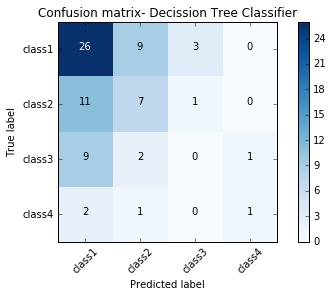

In [53]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix- Decission Tree Classifier')